# FINAL Project
Andrew Logue

### Loading and preprocessing the data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 1: Load and preprocess the images
# Set image size
img_size = (32, 32)

# Use ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training images
train_generator = datagen.flow_from_directory(
    os.path.join("traffic_light_images", 'training'),
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load and preprocess testing images
test_generator = datagen.flow_from_directory(
    os.path.join("traffic_light_images", 'test'),
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

2024-05-03 23:00:33.612419: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 23:00:33.616676: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 23:00:33.672965: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 23:00:33.674007: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 23:00:34.690836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Found 1188 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [2]:
# Step 2: Split the dataset into training and testing sets

X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

In [3]:
# Step 3: Build and train a Convolutional Neural Network (CNN) using TensorFlow/Keras
# Get the number of classes
num_classes = len(train_generator.class_indices)
# print(num_classes)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Build the model (.fit)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 1.0977 - accuracy: 0.4375 - val_loss: 1.1587 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 49ms/step - loss: 0.9001 - accuracy: 0.6250 - val_loss: 1.1445 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 44ms/step - loss: 0.7817 - accuracy: 0.6250 - val_loss: 1.0555 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 51ms/step - loss: 0.6919 - accuracy: 0.6250 - val_loss: 0.8962 - val_accuracy: 0.1562
Epoch 5/20
1/1 [==============================] - 0s 50ms/step - loss: 0.6225 - accuracy: 0.6875 - val_loss: 0.6518 - val_accuracy: 0.6875
Epoch 6/20
1/1 [==============================] - 0s 42ms/step - loss: 0.5400 - accuracy: 0.8750 - val_loss: 0.4572 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 44ms/step - loss: 0.4754 - accuracy: 0.9688 - val_loss: 0.3719 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=

1/1 [==============================] - 0s 26ms/step - loss: 0.0138 - accuracy: 1.0000

Test Acc. 100.00%
1/1 [==============================] - 0s 98ms/step
Number of misclassified 'RED' lights:  0


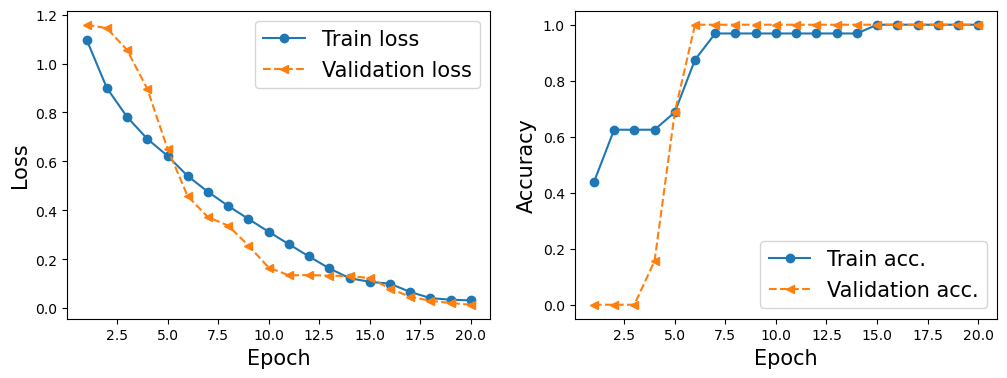

In [4]:
# Step 5: Evaluate
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))
# Prove that no "RED" lights are misclassified
y_pred_cnn = np.argmax(model.predict(X_test), axis=1)
misclassified_red_indices = np.where((np.argmax(y_test, axis=1) == 0) & (y_pred_cnn != 0))[0]
print(f"Number of misclassified 'RED' lights: ", len(misclassified_red_indices))

# Plot Model Accuracy and Loss
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

### Summarize results and enumerate conclusions:

The CNN model has achieved the required > 90% accuracy. There are no misclassified red lights. The model was trained to 20 epochs with a batch size of 32, to guarantee that > 90% accuracy was achieved. The loss of the model was < 0.1.

In [5]:
# Step 6: Choose another algorithm from scikit-learn and train it (MLP)

# Reshape the data
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_test_mlp = X_test.reshape(X_test.shape[0], -1)

# Select the ML algorithm, and its parameteters
mlp_classifier = MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(100, 50), alpha = 0.1)

# Build the model (.fit)
training_history = mlp_classifier.fit(X_train_mlp, np.argmax(y_train, axis=1))


Test Acc. 100.00%

Model Loss 0.05
Number of misclassified 'RED' lights:  0


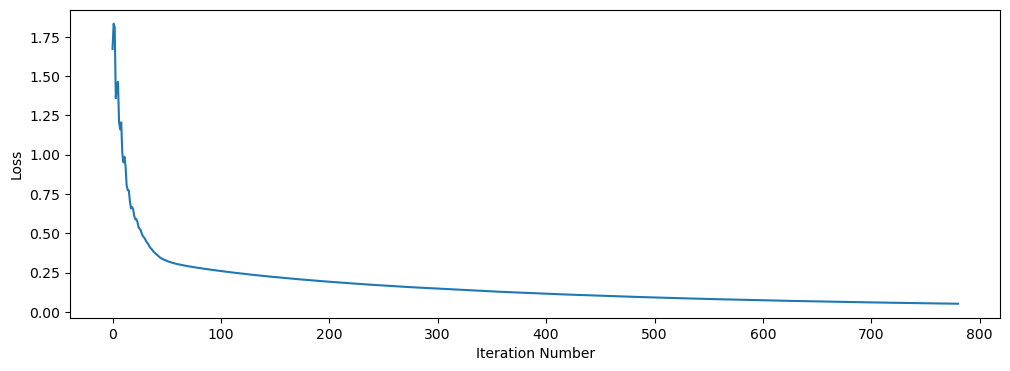

In [6]:
# Step 7: Evaluate
y_pred_mlp = mlp_classifier.predict(X_test_mlp)
accuracy_mlp = accuracy_score(np.argmax(y_test, axis=1), y_pred_mlp)
print('\nTest Acc. {:.2f}%'.format(accuracy_mlp*100))
print('\nModel Loss {:.2f}'.format(mlp_classifier.loss_curve_[-1]))
# Prove that no "RED" lights are misclassified
misclassified_red_indices = np.where((np.argmax(y_test, axis=1) == 0) & (y_pred_mlp != 0))[0]
print(f"Number of misclassified 'RED' lights: ", len(misclassified_red_indices))

# Plot Model Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.plot(mlp_classifier.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')

plt.show()

### Summarize results and enumerate conclusions:

The MLP classifier model has achieved the required > 90% accuracy. There are no misclassified red lights. The model was trained to no more than 1000 iterations, to guarantee that > 90% accuracy was achieved. The loss of the model was < 0.1. I am unsure how to graph the model accuracy.